## Customers Segmentation based on their Credit Card usage bhaviour

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.


**Content of this Kernel:**
* Data Preprocessing
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA

В папке clustering лежат данные CC_GENERAL и тетрадка HW.ipynb 
В тетрадке есть функции раскидывающие данные по бинам, их трогать не надо, 
но изучите внимательно что они делают. 
Ваша задача запустить StandartScaler и стандартизировать данные. 
Можете очистить от выбросов, можете этого не делать, 
на ваше усмотрение. Дальше попробуйте алгоритм k-means используя метод локтя и силуэта, 
чтобы определить оптимальное количество кластеров, отдельно используйте DBSCAN. 
Понизьте размерность с помощью PCA и визуализируйте.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data= pd.read_csv("cc_general.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,0.153715,11.517318,2.289497,1.591508,1.018659,0.943464,1.241117,3.778101,2.335642,1.597318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,0.292499,1.338331,1.317889,1.348634,1.269914,1.082753,1.577855,1.175955,1.286517,1.027433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,0.000000,12.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,0.142857,12.000000,3.000000,3.000000,2.000000,1.000000,3.000000,5.000000,3.000000,2.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,1.000000,12.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [7]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
BALANCE_RANGE                         0
PURCHASES_RANGE                       0
ONEOFF_PURCHASES_RANGE                0
INSTALLMENTS_PURCHASES_RANGE          0
CASH_ADVANCE_RANGE                    0
CREDIT_LIMIT_RANGE                    0
PAYMENTS_RANGE                        0


In [38]:
#data['CREDIT_LIMIT'].median(), data['MINIMUM_PAYMENTS'].median()
median_min_payment = 3000
median_credit_limit = 312.

data.loc[:, ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe()

,CREDIT_LIMIT,MINIMUM_PAYMENTS
count,8949.000000,8637.000000
mean,4494.449450,864.206542
std,3638.815725,2372.446607
min,50.000000,0.019163
25%,1600.000000,169.123707
50%,3000.000000,312.343947
75%,6500.000000,825.485459
max,30000.000000,76406.207520


In [46]:
data.fillna({'CREDIT_LIMIT': median_credit_limit, 'MINIMUM_PAYMENTS': median_min_payment}, inplace=True)
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
BALANCE_RANGE                       0
PURCHASES_RANGE                     0
ONEOFF_PURCHASES_RANGE              0
INSTALLMENTS_PURCHASES_RANGE        0
CASH_ADVANCE_RANGE                  0
CREDIT_LIMIT_RANGE                  0
PAYMENTS_RANGE                      0
MINIMUM_PAYMENTS_RANGE              0
dtype: int64

In [47]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6
 

In [48]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10
    

In [49]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [50]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

In [65]:
data.columns

Index(['TENURE', 'BALANCE_RANGE', 'PURCHASES_RANGE', 'ONEOFF_PURCHASES_RANGE',
       'INSTALLMENTS_PURCHASES_RANGE', 'CASH_ADVANCE_RANGE',
       'CREDIT_LIMIT_RANGE', 'PAYMENTS_RANGE', 'MINIMUM_PAYMENTS_RANGE',
       'BALANCE_FREQUENCY_RANGE', 'PURCHASES_FREQUENCY_RANGE',
       'ONEOFF_PURCHASES_FREQUENCY_RANGE',
       'PURCHASES_INSTALLMENTS_FREQUENCY_RANGE',
       'CASH_ADVANCE_FREQUENCY_RANGE', 'PRC_FULL_PAYMENT_RANGE',
       'PURCHASES_TRX_RANGE', 'CASH_ADVANCE_TRX_RANGE'],
      dtype='object')

Normalizing input values.

In [52]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = StandardScaler().fit_transform(X)
X

array([[ 0.36067954, -0.97851102, -0.43862278, ..., -0.54119881,
        -0.64681226, -0.69462206],
       [ 0.36067954,  1.29798329, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [ 0.36067954,  0.53915185,  0.30290987, ..., -0.54119881,
         0.25898804, -0.69462206],
       ...,
       [-4.12276757, -0.97851102, -0.43862278, ...,  0.45299851,
        -0.64681226, -0.69462206],
       [-4.12276757, -0.97851102, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [-4.12276757, -0.97851102,  1.04444252, ..., -0.54119881,
         1.16478834,  0.12597818]])

In [53]:
from sklearn.cluster import KMeans

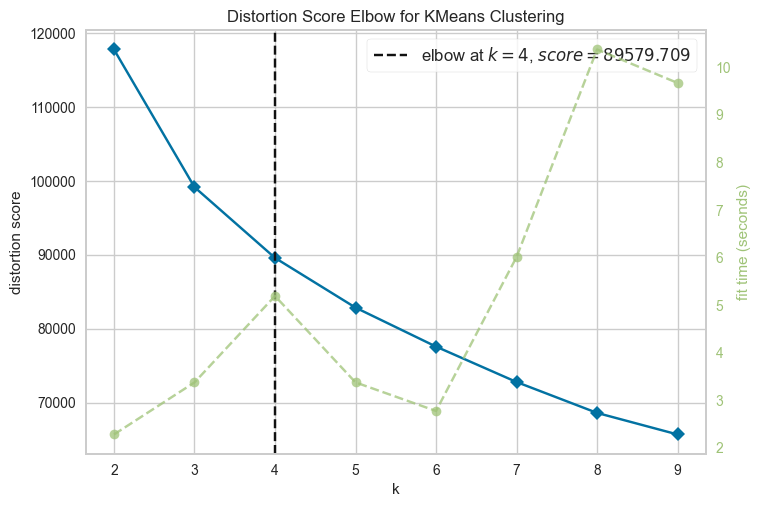

In [55]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)

visualizer.show()
plt.show()

Чем больше кластеров тем меньше внутрикластерная дисперсия каждого. 
Но после какого-то значания эта дисперсия перестает значительно уменьшаться.
Это и будет оптимальное количество кластеров. В данном случае оно не определяется, 
поскольку резкого перегиба графика метрики нет. Что-то наблюдается при значении 3.

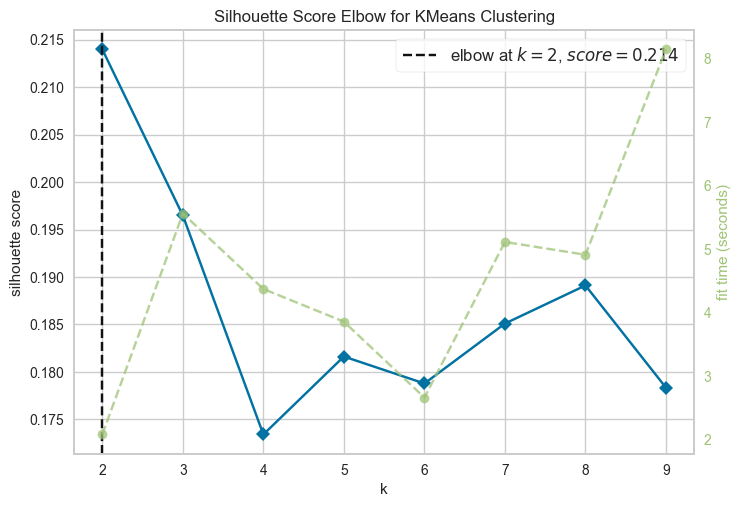

In [56]:
model2 = KMeans(random_state=1)

visualizer = KElbowVisualizer(model2, k=(2,10), metric='silhouette')
visualizer.fit(X)

visualizer.show()
plt.show()

Метрика "силуэта" основана на внутрикластерном среднем расстоянии и расстоянии до чужого кластера 
и достигает максимума при оптимальном количестве кластеров. 
(То есть в правильном количестве кластеров внутри кластеров все близко, а чужие максимально далеко).
Здесь максимум метрики при значении 2. 

сравним 2 и 3 кластера

In [1]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

NameError: name 'X' is not defined

In [139]:
features = ['TENURE', 'BALANCE_RANGE', 'PURCHASES_RANGE', 'ONEOFF_PURCHASES_RANGE',
       'INSTALLMENTS_PURCHASES_RANGE', 'CASH_ADVANCE_RANGE',
       'CREDIT_LIMIT_RANGE', 'PAYMENTS_RANGE', 'MINIMUM_PAYMENTS_RANGE',
       'BALANCE_FREQUENCY_RANGE', 'PURCHASES_FREQUENCY_RANGE',
       'ONEOFF_PURCHASES_FREQUENCY_RANGE',
       'PURCHASES_INSTALLMENTS_FREQUENCY_RANGE',
       'CASH_ADVANCE_FREQUENCY_RANGE', 'PRC_FULL_PAYMENT_RANGE',
       'PURCHASES_TRX_RANGE', 'CASH_ADVANCE_TRX_RANGE']
def compare(n, x_this, data_this):

    KM_n_clusters = KMeans(n_clusters=n, init='k-means++').fit(x_this) # initialise and fit K-Means model

    # KM_n_clusters.labels_
    KMn_clustered = data_this.copy()
    KMn_clustered.loc[:,'Cluster'] = KM_n_clusters.labels_ # append labels to points
    KM_clust_sizes = KMn_clustered.groupby('Cluster').size().to_frame()
    KM_clust_sizes.columns = ["KM_size"]
    
    
    plt.figure(figsize=(10,6))
    plt.scatter(X_reduced[:, 0], X_reduced[:,1], c = KM_n_clusters.labels_, alpha=0.7,
                cmap = plt.cm.get_cmap('nipy_spectral', 10))
    plt.colorbar()
    print(KM_clust_sizes)

         KM_size
Cluster         
0           4664
1           4286


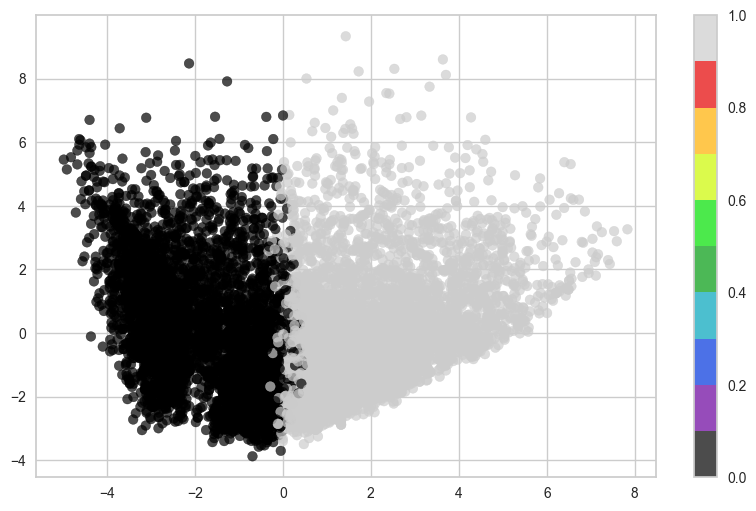

In [140]:
compare(2, X, data)

         KM_size
Cluster         
0           2997
1           3719
2           2234


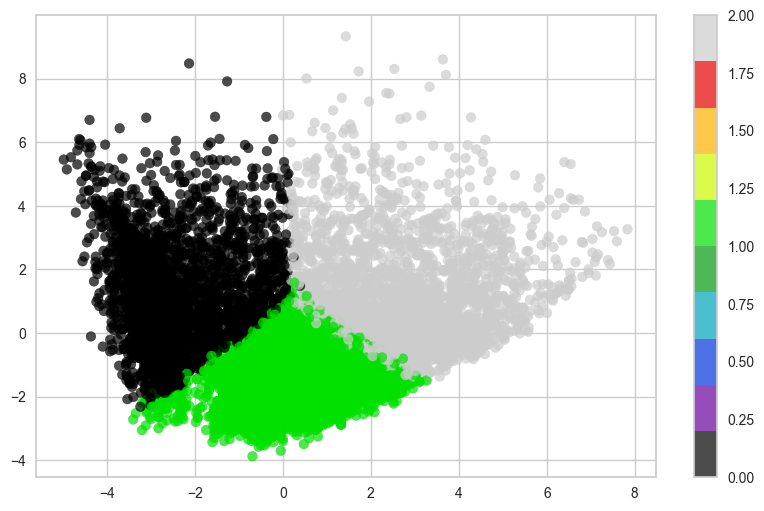

In [143]:
compare(3, X, data)

         KM_size
Cluster         
0           2330
1           3043
2           1705
3           1872


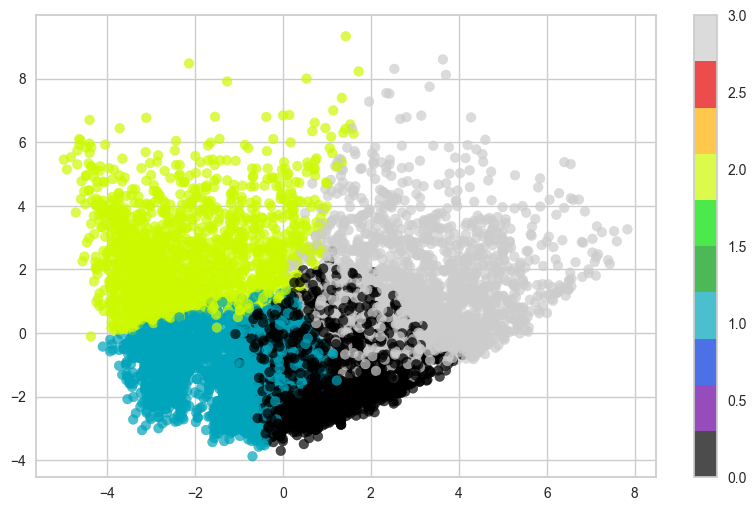

In [144]:
# посмотрмм еще на 4
compare(4, X, data)


         KM_size
Cluster         
0           2476
1           1170
2           1813
3           1328
4           2163


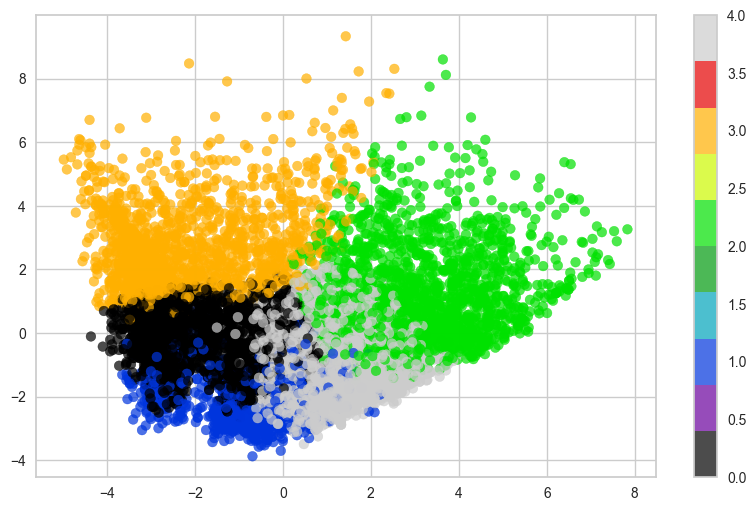

In [145]:
compare(5, X, data)

2 или 3 кластера